# Actividad 1: Proyecto de Python
### Estudiante: Josué Rivas
### Fecha de entrega: 08/06/2025


#### Este es un dataset sobre compradores de bicicletas, en el cuál buscaremos que relación tienen las variables como la edad, el estado civil y más, con la compra de bicicletas.

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


In [57]:
df = pd.read_csv('bike_buyers.csv')

In [58]:
df.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No
1,24107,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No
2,14177,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No
3,24381,Single,NaN,70000.0,0.0,Bachelors,Professional,Yes,1.0,5-10 Miles,Pacific,41.0,Yes
4,25597,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,Yes


In [5]:
df.tail()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
995,23731,Married,Male,60000.0,2.0,High School,Professional,Yes,2.0,2-5 Miles,North America,54.0,Yes
996,28672,Single,Male,70000.0,4.0,Graduate Degree,Professional,Yes,0.0,2-5 Miles,North America,35.0,Yes
997,11809,Married,NaN,60000.0,2.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,North America,38.0,Yes
998,19664,Single,Male,100000.0,3.0,Bachelors,Management,No,3.0,1-2 Miles,North America,38.0,No
999,12121,Single,Male,60000.0,3.0,High School,Professional,Yes,2.0,10+ Miles,North America,53.0,Yes


In [6]:
df.shape

(1000, 13)

In [7]:
df.columns

Index(['ID', 'Marital Status', 'Gender', 'Income', 'Children', 'Education',
       'Occupation', 'Home Owner', 'Cars', 'Commute Distance', 'Region', 'Age',
       'Purchased Bike'],
      dtype='object')

In [59]:
df.dtypes

ID                    int64
Marital Status       object
Gender               object
Income              float64
Children            float64
Education            object
Occupation           object
Home Owner           object
Cars                float64
Commute Distance     object
Region               object
Age                 float64
Purchased Bike       object
dtype: object

In [60]:
df.describe()

,ID,Income,Children,Cars,Age
count,1000.000000,994.000000,992.000000,991.000000,992.000000
mean,19965.992000,56267.605634,1.910282,1.455096,44.181452
std,5347.333948,31067.817462,1.626910,1.121755,11.362007
min,11000.000000,10000.000000,0.000000,0.000000,25.000000
25%,15290.750000,30000.000000,0.000000,1.000000,35.000000
50%,19744.000000,60000.000000,2.000000,1.000000,43.000000
75%,24470.750000,70000.000000,3.000000,2.000000,52.000000
max,29447.000000,170000.000000,5.000000,4.000000,89.000000


 
Con el resumen estadístico de las variables numéricas podemos observar que la edad promedio es de aproximadamente 44 años, el ingreso medio es de $60k y la mayoría de las personas tienen entre 0 y 3 hijos y autos. Hay una dispersión considerable en los ingresos y la edad.

In [10]:
df.nunique()

ID                  1000
Marital Status         2
Gender                 2
Income                16
Children               6
Education              5
Occupation             5
Home Owner             2
Cars                   5
Commute Distance       5
Region                 3
Age                   53
Purchased Bike         2
dtype: int64

In [61]:
df.isnull().sum()

ID                   0
Marital Status       7
Gender              11
Income               6
Children             8
Education            0
Occupation           0
Home Owner           4
Cars                 9
Commute Distance     0
Region               0
Age                  8
Purchased Bike       0
dtype: int64

In [62]:
# Imputar valores nulos en variables numéricas con la mediana
df['Income'].fillna(df['Income'].median(), inplace=True)
df['Children'].fillna(df['Children'].median(), inplace=True)
df['Cars'].fillna(df['Cars'].median(), inplace=True)
df['Age'].fillna(df['Age'].median(), inplace=True)

# Imputar valores nulos en variables categóricas con la moda
for col in ['Marital Status', 'Gender', 'Home Owner']:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Verificar que ya no haya valores nulos
print("Valores nulos después de la limpieza:")
print(df.isnull().sum())

Valores nulos después de la limpieza:
ID                  0
Marital Status      0
Gender              0
Income              0
Children            0
Education           0
Occupation          0
Home Owner          0
Cars                0
Commute Distance    0
Region              0
Age                 0
Purchased Bike      0
dtype: int64


In [12]:
df.duplicated().sum()

0

In [58]:
# variables categóricas
describe_cat = df.describe(include=['object'])
print('\
Resumen de variables categóricas:')
print(describe_cat)

Resumen de variables categóricas:
       Marital Status Gender  Education    Occupation Home Owner  \
count             993    989       1000          1000        996   
unique              2      2          5             5          2   
top           Married   Male  Bachelors  Professional        Yes   
freq              535    500        306           276        682   

       Commute Distance         Region Purchased Bike  
count              1000           1000           1000  
unique                5              3              2  
top           0-1 Miles  North America             No  
freq                366            508            519  


En cuanto a las variables categóricas, la mayoría están casados, la educación más común es "Bachelors", y la ocupación más frecuente es "Professional". La mayoría son propietarios de vivienda y viven en Norteamérica. 
El 51.9% no compró bicicleta.

In [15]:
#Convertir las variables categóricas a numericas
#Creamos una copia de nuestro dataframe
df_encoded = df.copy()

# Identificar variables categoricas
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Utilizamis LabelEncoder
le = LabelEncoder()
for col in categorical_cols:
    df[col] = df[col].astype(str)  # Asegurar que todos los valores sean string
    df[col] = le.fit_transform(df[col])



In [17]:
df_encoded.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,0,0,40000.0,1.0,0,4,1,0.0,0,0,42.0,0
1,24107,0,1,30000.0,3.0,3,0,1,1.0,0,0,43.0,0
2,14177,0,1,80000.0,5.0,3,3,0,2.0,3,0,60.0,0
3,24381,1,2,70000.0,0.0,0,3,1,1.0,4,2,41.0,1
4,25597,1,1,30000.0,0.0,0,0,0,0.0,0,0,36.0,1


In [18]:
df_encoded.describe()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
count,1000.000000,1000.000000,1000.000000,994.000000,992.000000,1000.000000,1000.000000,1000.000000,991.000000,1000.000000,1000.00000,992.000000,1000.000000
mean,19965.992000,0.472000,0.522000,56267.605634,1.910282,1.631000,2.259000,0.690000,1.455096,1.645000,0.89200,44.181452,0.481000
std,5347.333948,0.513303,0.521333,31067.817462,1.626910,1.353762,1.453283,0.471298,1.121755,1.561862,0.69341,11.362007,0.499889
min,11000.000000,0.000000,0.000000,10000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,25.000000,0.000000
25%,15290.750000,0.000000,0.000000,30000.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.00000,35.000000,0.000000
50%,19744.000000,0.000000,1.000000,60000.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.00000,43.000000,0.000000
75%,24470.750000,1.000000,1.000000,70000.000000,3.000000,3.000000,4.000000,1.000000,2.000000,3.000000,1.00000,52.000000,1.000000
max,29447.000000,2.000000,2.000000,170000.000000,5.000000,4.000000,4.000000,2.000000,4.000000,4.000000,2.00000,89.000000,1.000000


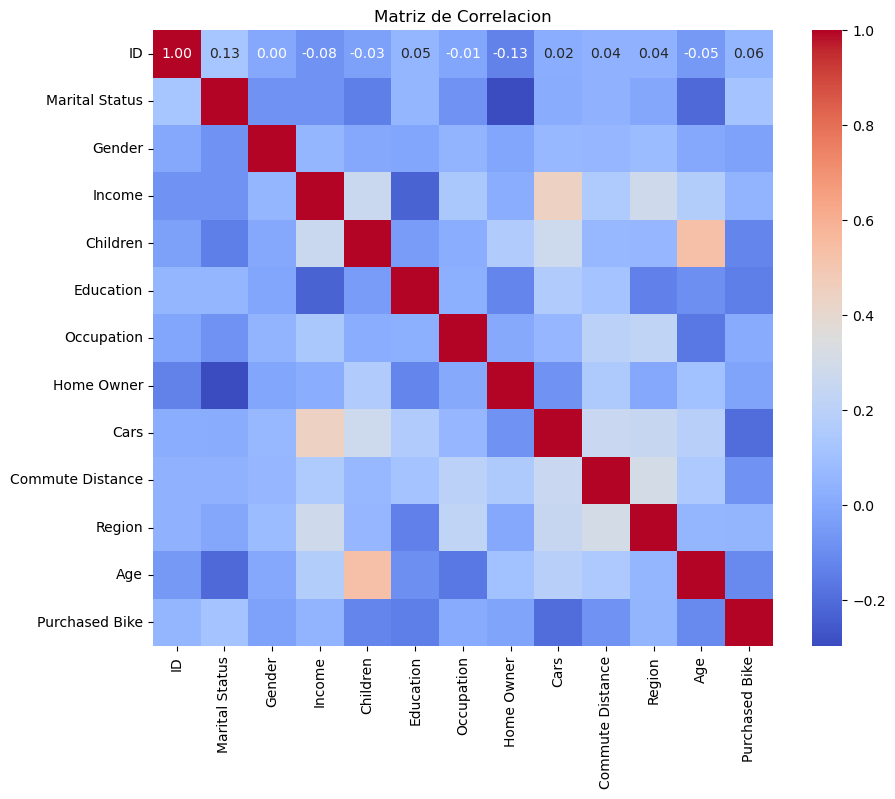

In [63]:
# Visualizacion de la matriz de correlacion
plt.figure(figsize=(10,8))
corr = df_encoded.corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Matriz de Correlacion')
plt.show()

C:\Users\alexa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\alexa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


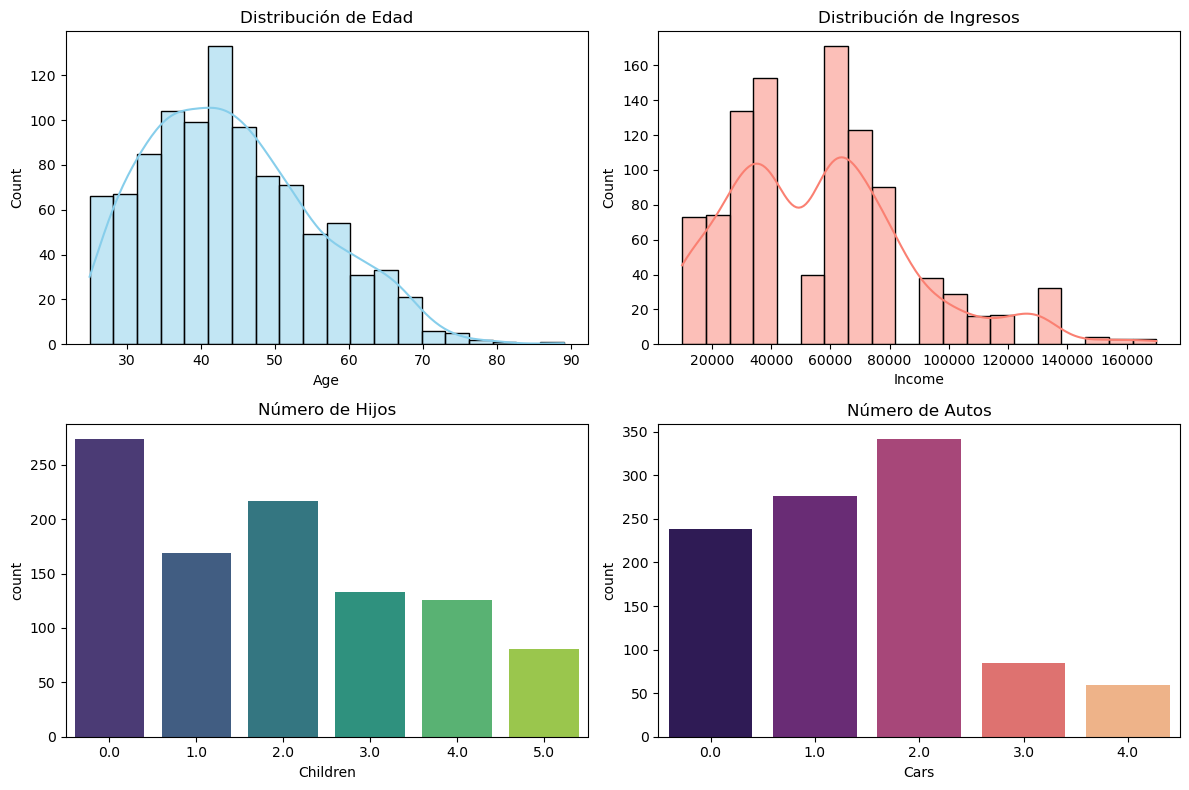

In [64]:
# Visualización de variables categóricas
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

sns.histplot(df['Age'], bins=20, kde=True, ax=axs[0,0], color='skyblue')
axs[0,0].set_title('Distribución de Edad')

sns.histplot(df['Income'], bins=20, kde=True, ax=axs[0,1], color='salmon')
axs[0,1].set_title('Distribución de Ingresos')

sns.countplot(x='Children', data=df, ax=axs[1,0], palette='viridis')
axs[1,0].set_title('Número de Hijos')

sns.countplot(x='Cars', data=df, ax=axs[1,1], palette='magma')
axs[1,1].set_title('Número de Autos')

plt.tight_layout()
plt.show()



La distribución de la edad es aproximadamente normal, con la mayoría de los compradores entre 35 y 52 año
s.
Los ingresos presentan una distribución sesgada a la derecha, con la mayoría de los ingresos e60k - 70k
La mayoría de las personas tienen entre 0 y 3 hijos y auts.

1. El grupo demográfico más fuerte para ventas está entre 35 y 50 años.

2. Las bicicletas son más compradas por personas de ingresos medios.

3. Las personas con menos hijos tienden a comprar más.

4. La mayoría de los compradores tienen 2 autos.

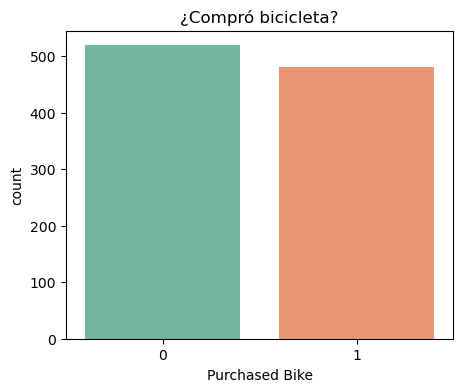

In [22]:
# Visualización de la variable objetivo
plt.figure(figsize=(5,4))
sns.countplot(x='Purchased Bike', data=df, palette='Set2')
plt.title('¿Compró bicicleta?')
plt.show()

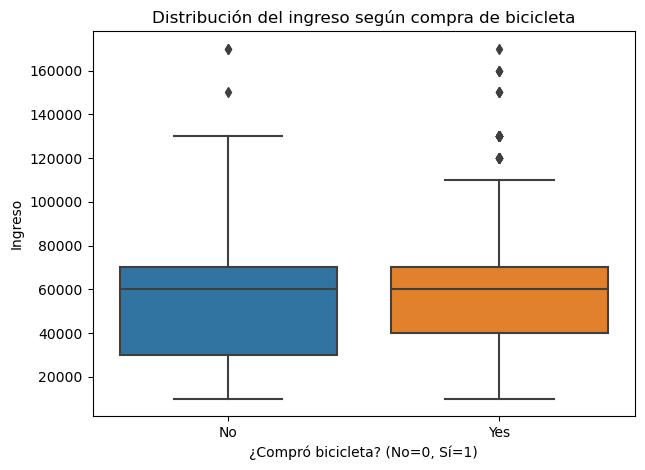

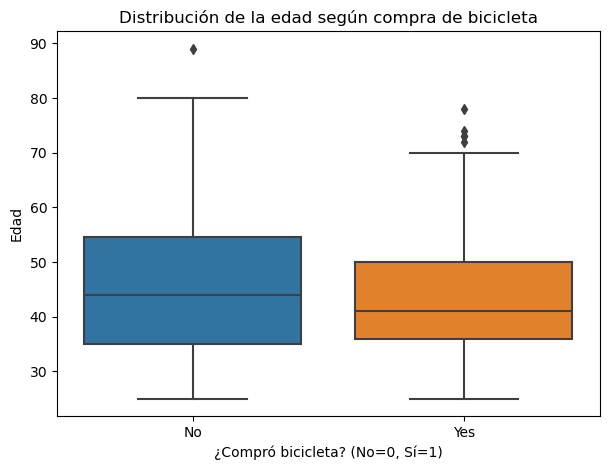

In [53]:
# Boxplot de ingreso por compra de bicicleta
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7,5))
sns.boxplot(x='Purchased Bike', y='Income', data=df)
plt.title('Distribución del ingreso según compra de bicicleta')
plt.xlabel('¿Compró bicicleta? (No=0, Sí=1)')
plt.ylabel('Ingreso')
plt.show()

# Boxplot de edad por compra de bicicleta
plt.figure(figsize=(7,5))
sns.boxplot(x='Purchased Bike', y='Age', data=df)
plt.title('Distribución de la edad según compra de bicicleta')
plt.xlabel('¿Compró bicicleta? (No=0, Sí=1)')
plt.ylabel('Edad')
plt.show()

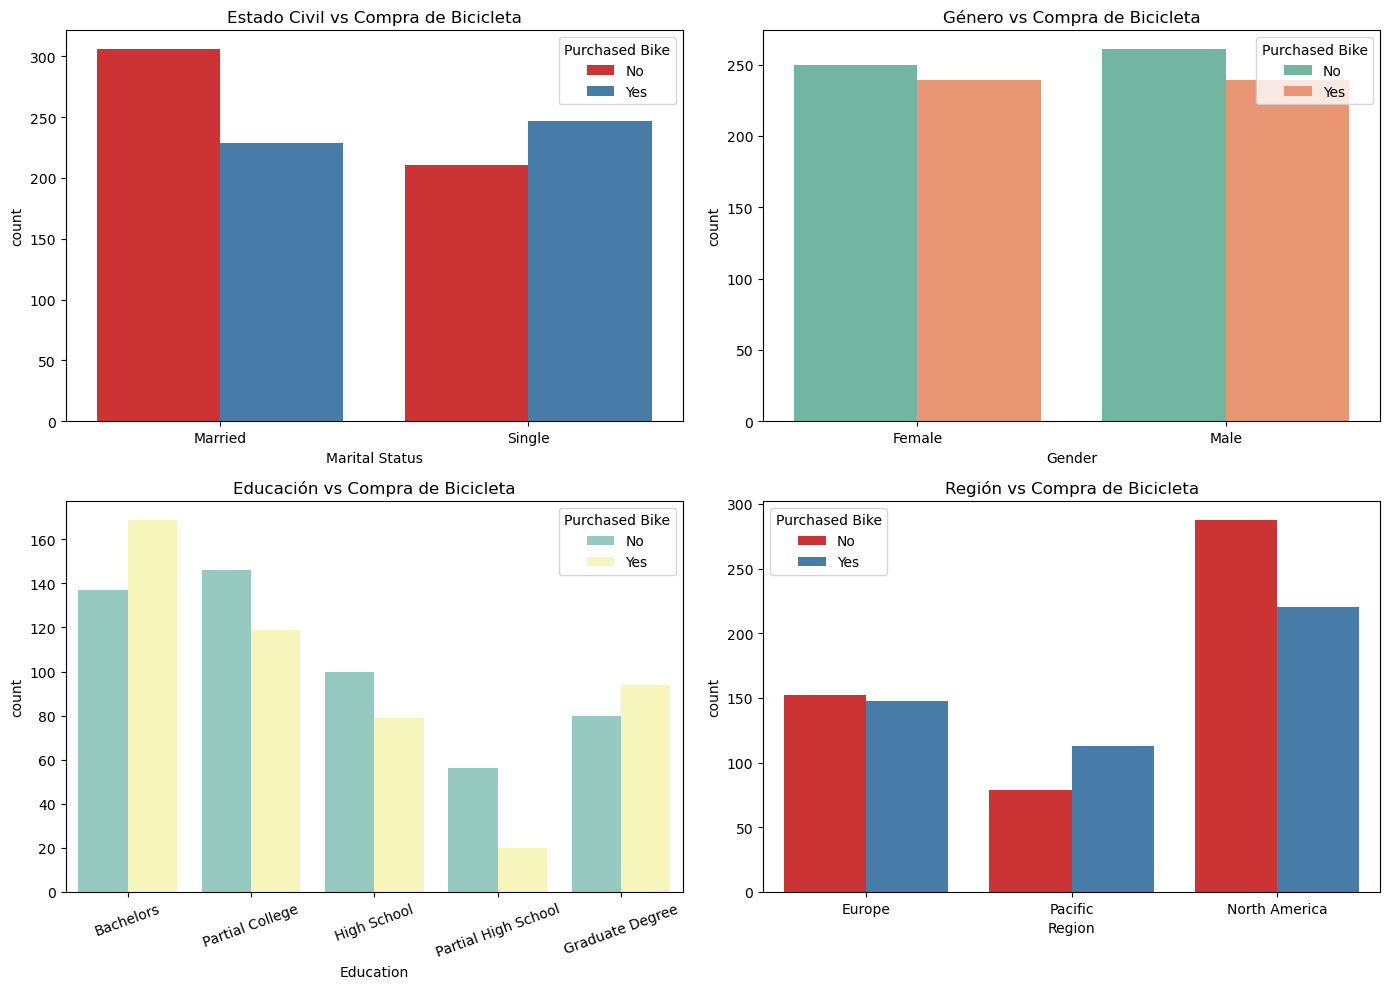

In [63]:
# Gráficos de barras para algunas de las variables categoricas
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

sns.countplot(x='Marital Status', hue='Purchased Bike', data=df, ax=axs[0,0], palette='Set1')
axs[0,0].set_title('Estado Civil vs Compra de Bicicleta')

sns.countplot(x='Gender', hue='Purchased Bike', data=df, ax=axs[0,1], palette='Set2')
axs[0,1].set_title('Género vs Compra de Bicicleta')

sns.countplot(x='Education', hue='Purchased Bike', data=df, ax=axs[1,0], palette='Set3')
axs[1,0].set_title('Educación vs Compra de Bicicleta')
axs[1,0].tick_params(axis='x', rotation=20)

sns.countplot(x='Region', hue='Purchased Bike', data=df, ax=axs[1,1], palette='Set1')
axs[1,1].set_title('Región vs Compra de Bicicleta')

plt.tight_layout()
plt.show()

In [24]:
df_encoded.loc[:, df_encoded.std() == 0].columns

Index([], dtype='object')

In [25]:
df_encoded.max(numeric_only=True)

ID                   29447.0
Marital Status           2.0
Gender                   2.0
Income              170000.0
Children                 5.0
Education                4.0
Occupation               4.0
Home Owner               2.0
Cars                     4.0
Commute Distance         4.0
Region                   2.0
Age                     89.0
Purchased Bike           1.0
dtype: float64

In [26]:
(df_encoded < 0).sum()

ID                  0
Marital Status      0
Gender              0
Income              0
Children            0
Education           0
Occupation          0
Home Owner          0
Cars                0
Commute Distance    0
Region              0
Age                 0
Purchased Bike      0
dtype: int64

In [27]:
df_encoded.skew(numeric_only=True)

ID                  0.045449
Marital Status      0.267964
Gender              0.145606
Income              0.751171
Children            0.393000
Education           0.132595
Occupation         -0.303832
Home Owner         -0.707489
Cars                0.417883
Commute Distance    0.326730
Region              0.147076
Age                 0.523397
Purchased Bike      0.076169
dtype: float64

In [30]:
df_encoded.kurtosis(numeric_only=True)

ID                 -1.190481
Marital Status     -1.553957
Gender             -1.442613
Income              0.517735
Children           -1.018474
Education          -1.353726
Occupation         -1.322499
Home Owner         -1.187305
Cars               -0.398538
Commute Distance   -1.458432
Region             -0.920924
Age                -0.261334
Purchased Bike     -1.998199
dtype: float64

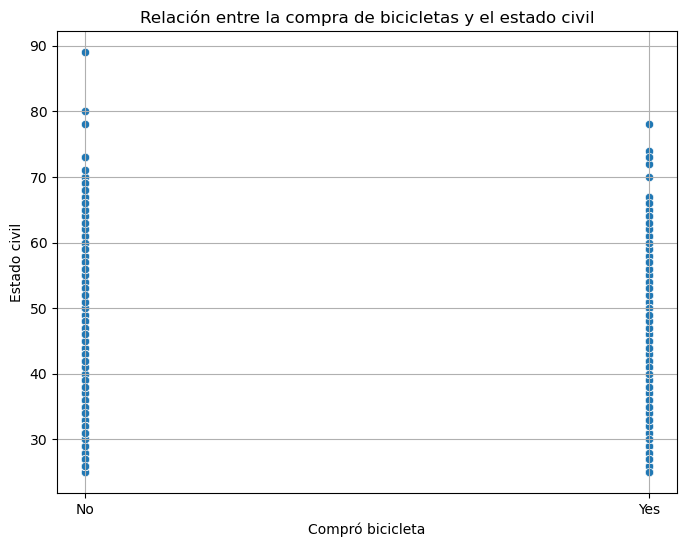

In [41]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Purchased Bike', y='Age')
plt.title('Relación entre la compra de bicicletas y el estado civil')
plt.xlabel('Compró bicicleta')
plt.ylabel('Estado civil')
plt.grid(True)
plt.show()

In [49]:
from scipy.stats import zscore

df['z_Age'] = zscore(df['Age'])

# Outliers con z-score > 3 o < -3
outliers_z = df[(df['z_Age'] > 10) | (df['z_Age'] < -70)]

print(f"Se encontraron {len(outliers_z)} outliers con Z-score.")


Se encontraron 0 outliers con Z-score.


## Conclusión

Las bicicletas parecen ser más populares entre adultos de mediana edad, con ingresos medios, pocas responsabilidades familiares (0-2 hijos) y que poseen 1 o 2 autos. por lo cual la compra de bicicleta es para ejercicio, recreación y no para sustituir su transporte principal.